In [1]:
import straph as sg
import matplotlib.pyplot as plt

In [2]:
plt.rcParams["figure.figsize"] = (12,9)

# Connected Components

Connected components are among the most basic, useful and important concepts of
graph theory. It is common usage to decompose a graph into its connected components.
If a graph is not connected, it can be divided into distinct connected components.
Many properties, which involve computation of paths or communities, can
be computed independently on each connected component, thus enabling parallel
execution of numerous methods.

Connected components were recently generalized to [stream graphs](https://arxiv.org/abs/1710.04073). These generalized
connected components have a crucial feature: like graph connected components
and unlike other generalizations available in the literature, they partition the set of
temporal nodes. This means that each node at each time instant is in one and only one
connected component. This makes these generalized connected components particularly
appealing to capture important features of the vast variety of objects modeled
by stream graphs.

In [3]:
path_directory = "examples/"
S = sg.read_stream_graph(path_nodes=path_directory + "example_nodes.sg",
                         path_links=path_directory + "example_links.sg")

## Weakly Connected Components

In a Stream Graph, $S = (T,V,W,E)$, weakly connected components represent elements of $W$
connected together without any constraint on time.

Intuitively, the weakly connected components correspond to the disconnected parts
of a drawing of a stream graph.

findfont: Font family ['Garamond'] not found. Falling back to DejaVu Sans.


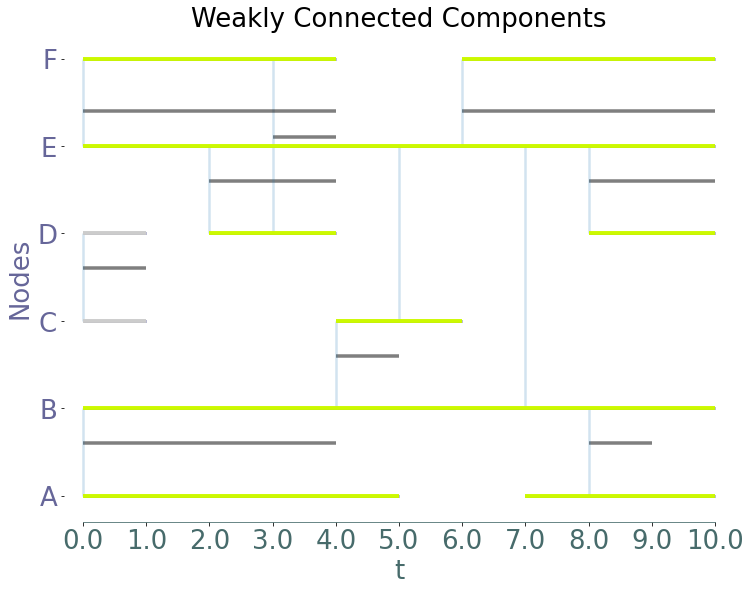

In [4]:
wcc = S.weakly_connected_components()
_ = S.plot(clusters=wcc,title="Weakly Connected Components")

These elements can be analysed separately to
observe and compute some properties, allowing a parallel implementation of several methods.

## Strongly Connected Components

Inside a strongly connected component all nodes are reachable from any other at any
time instant.

This definition is consistent with the one used in graph theory: for any time instant, if
we take the induced Graph $G_t$ the SCC at $t$ corresponds to the connected components
of $G_t$.

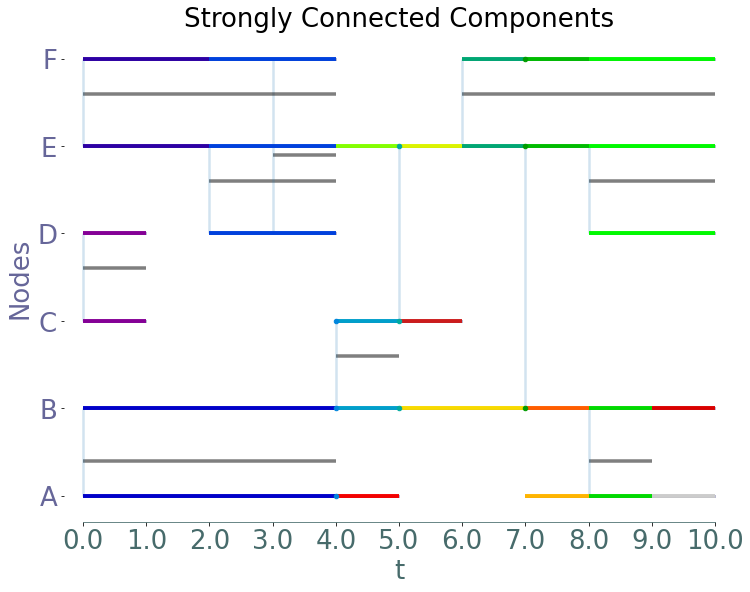

In [5]:
scc = S.strongly_connected_components(format = "cluster")
_ = S.plot(clusters=scc,title="Strongly Connected Components")

## Stable Connected Components

A stable connected component is a cluster $C = (I,X)$, $I = [b,e]$, $X \in V$ where interactions between the nodes have begun before $b$ or at the same time and have ended after $e$ or at the same time.

The decomposition into stable connected components is a
finer grain decomposition of the stream graph than the one into strongly connected
components.

A stable connected component, $C = (I,X)$, can be reduced to a static graph $G_C = (X,E_C)$ spanning $I$.

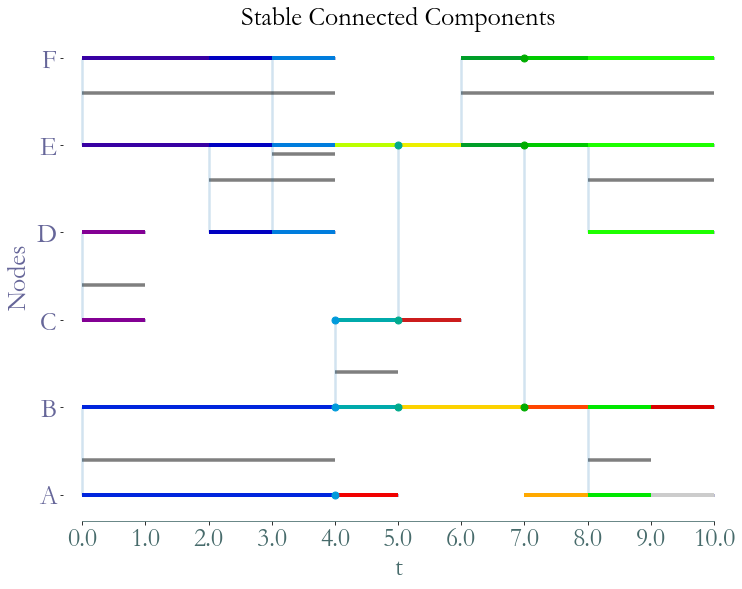

In [10]:
stcc = S.stable_connected_components(format = "cluster")
_ = S.plot(clusters=stcc,title="Stable Connected Components")

For more details we refer to the paper [Connected Components in Stream Graphs](https://arxiv.org/abs/2011.08054).